# Example of the aitlas toolbox in the context of object detection in remote sensing images

## Import the required packages

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

from aitlas.datasets import ObjectDetectionRfiCocoDataset 
from aitlas.transforms import Resize
from aitlas.utils import image_loader
from aitlas.models import FasterRCNN

## Visualize images and objects witn bounding boxes

Total number of patches: 3940


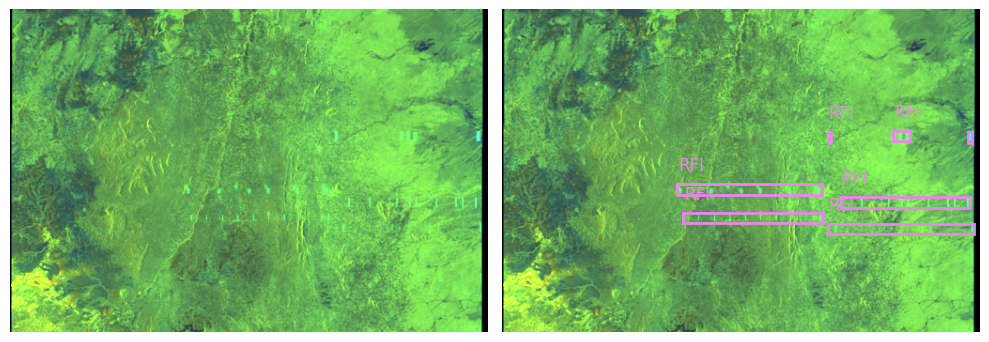

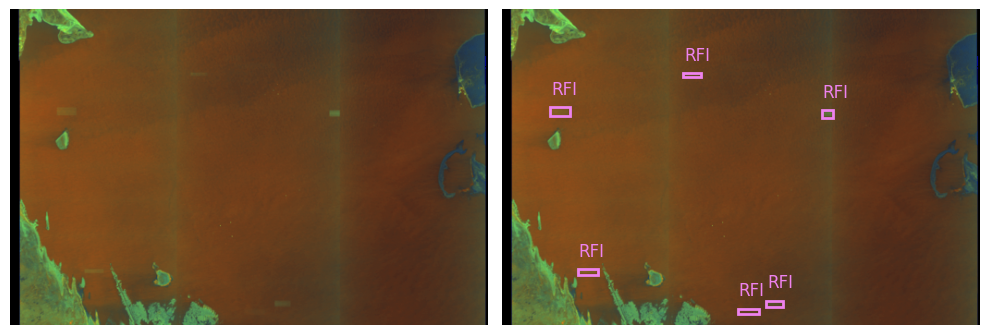

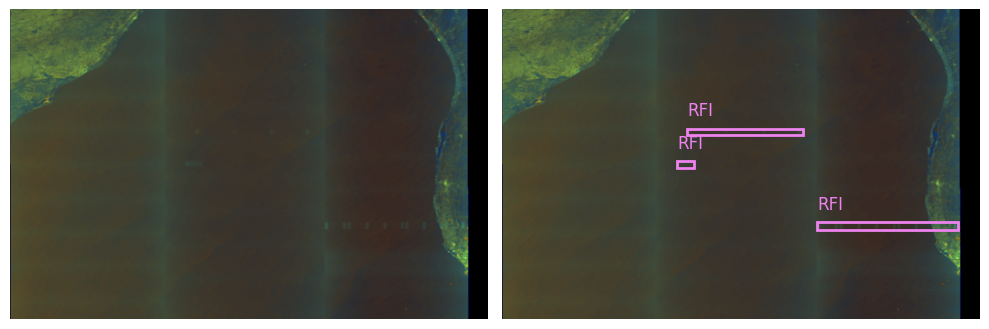

In [5]:
dataset_config = {
    "data_dir": "/home/dragik/data/rfi/rfi_final/",
    "annotation_dir": "/home/dragik/data/rfi/COCO/",
}
dataset = ObjectDetectionRfiCocoDataset(dataset_config)

print(f"Total number of patches: {len(dataset)}")
dataset.show_image(0);
dataset.show_image(800);
dataset.show_image(1200);

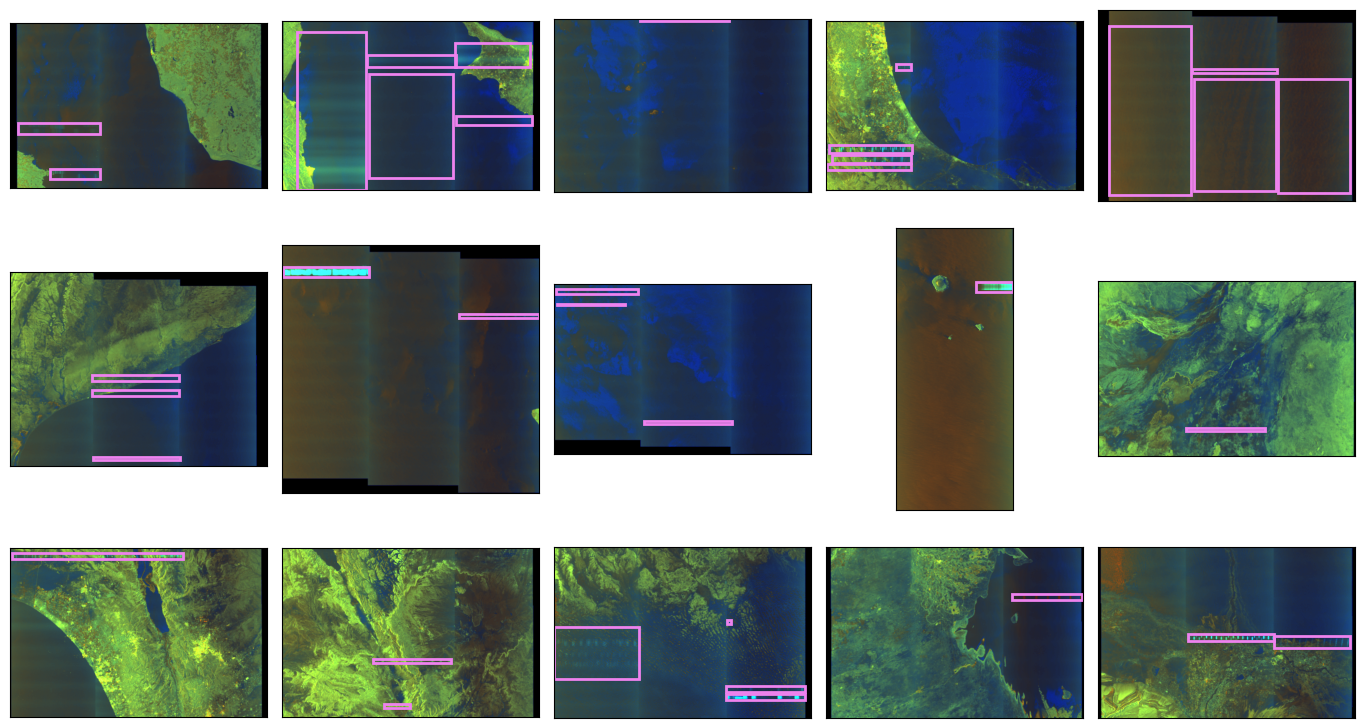

In [6]:
dataset.show_batch(15);

In [7]:
dataset.data_distribution_table()

,Label,Count
0,RFI,11724
1,Other Anomaly,301


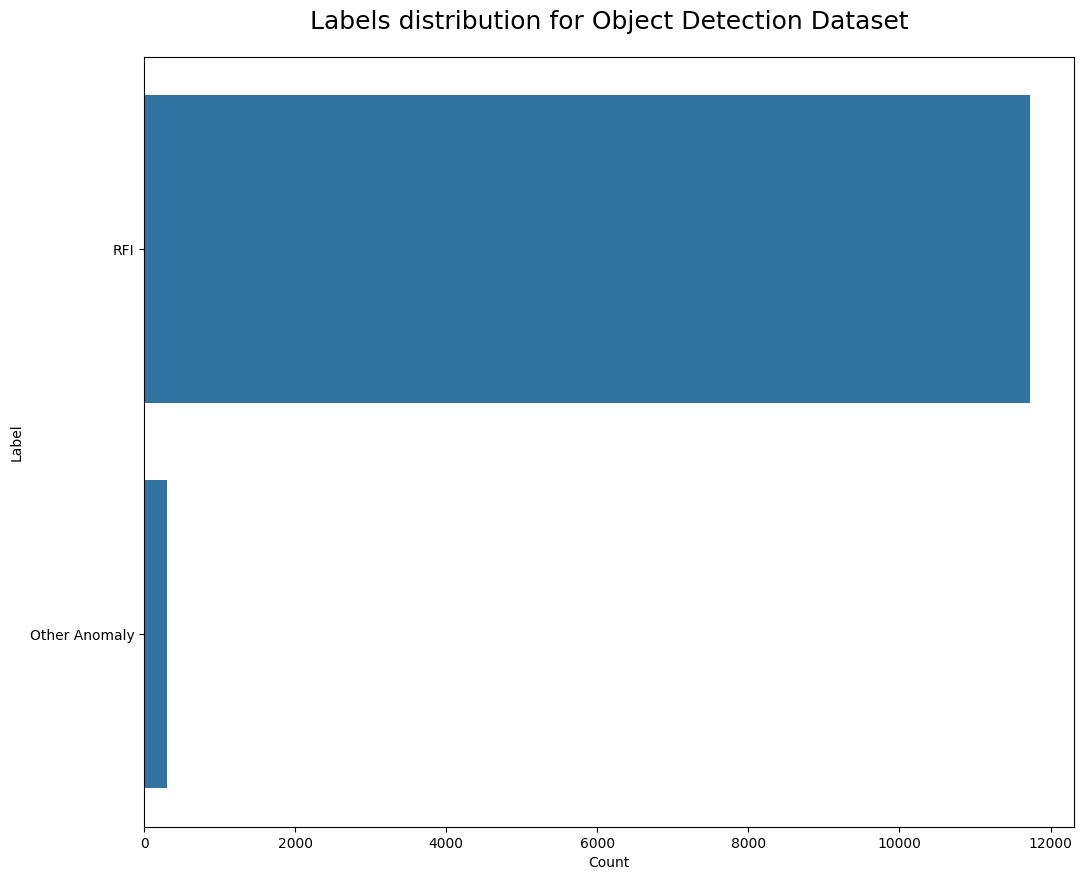

In [8]:
dataset.data_distribution_barchart();

## Load training data

In [9]:
train_dataset_config = {
    "batch_size": 8,
    "shuffle": True,
    "data_dir": "/home/dragik/data/rfi/rfi_final/",
    "annotation_dir": "/home/dragik/data/rfi/COCO/",
    "joint_transforms": ["aitlas.transforms.ResizeToTensorV2"]
}
train_dataset = ObjectDetectionRfiCocoDataset(train_dataset_config)

print(f"Total number of train images: {len(train_dataset)}")

Total number of train images: 3940


## Create the model

In [10]:
epochs = 10
model_directory = "/home/dragik/data/rfi/experiments/coco/"
model_config = {
    "num_classes": 2,
    "learning_rate": 0.0001,
    "pretrained": True,
    "metrics": ["map"]
}

model = FasterRCNN(model_config)
model.prepare()

## Start the training

In [11]:
model.train_model(
    train_dataset=train_dataset,
    epochs=epochs,
    model_directory=model_directory,
    run_id='1'
);

Starting training.


training:  20%|██████████████▍                                                         | 99/493 [00:34<02:03,  3.18it/s]

[1, 100], loss:  2.81707


training:  40%|████████████████████████████▋                                          | 199/493 [01:06<01:35,  3.07it/s]

[1, 200], loss:  1.62920


training:  61%|███████████████████████████████████████████                            | 299/493 [01:39<01:03,  3.06it/s]

[1, 300], loss:  1.35647


training:  81%|█████████████████████████████████████████████████████████▍             | 399/493 [02:12<00:31,  3.03it/s]

[1, 400], loss:  1.24805


training: 100%|███████████████████████████████████████████████████████████████████████| 493/493 [02:43<00:00,  3.02it/s]

epoch: 1, time: 164, loss:  0.20892



testing on train set: 100%|███████████████████████████████████████████████████████████| 493/493 [01:24<00:00,  5.85it/s]


map:0.0026644314639270306, map_50:0.00837712176144123, map_75:0.0006085899076424539, map_small:0.017273468896746635, map_medium:0.003438919084146619, map_large:0.0016884761862456799, mar_1:0.032392024993896484, mar_10:0.08372092992067337, mar_100:0.08538205921649933, mar_small:0.09253731369972229, mar_medium:0.08308270573616028, mar_large:0.06617647409439087, map_per_class:tensor(0.), tensor(0.0053), mar_100_per_class:tensor(0.), tensor(0.1708), classes:tensor(0, dtype=torch.int32), tensor(1, dtype=torch.int32)


training:  20%|██████████████▍                                                         | 99/493 [00:33<02:08,  3.07it/s]

[2, 100], loss:  0.98745


training:  40%|████████████████████████████▋                                          | 199/493 [01:05<01:35,  3.09it/s]

[2, 200], loss:  0.95969


training:  61%|███████████████████████████████████████████                            | 299/493 [01:37<01:01,  3.15it/s]

[2, 300], loss:  0.92759


training:  81%|█████████████████████████████████████████████████████████▍             | 399/493 [02:10<00:30,  3.11it/s]

[2, 400], loss:  0.91689


training: 100%|███████████████████████████████████████████████████████████████████████| 493/493 [02:40<00:00,  3.08it/s]

epoch: 2, time: 160, loss:  0.11925



testing on train set: 100%|███████████████████████████████████████████████████████████| 493/493 [01:19<00:00,  6.22it/s]


map:0.02979562059044838, map_50:0.061130091547966, map_75:0.022870633751153946, map_small:0.04313942790031433, map_medium:0.022335540503263474, map_large:0.02368716150522232, mar_1:0.06279069930315018, mar_10:0.1566445231437683, mar_100:0.1566445231437683, mar_small:0.16753731667995453, mar_medium:0.13947369158267975, mar_large:0.18088234961032867, map_per_class:tensor(0.), tensor(0.0596), mar_100_per_class:tensor(0.), tensor(0.3133), classes:tensor(0, dtype=torch.int32), tensor(1, dtype=torch.int32)


training:  20%|██████████████▍                                                         | 99/493 [00:33<02:08,  3.06it/s]

[3, 100], loss:  0.74512


training:  40%|████████████████████████████▋                                          | 199/493 [01:06<01:36,  3.06it/s]

[3, 200], loss:  0.76952


training:  61%|███████████████████████████████████████████                            | 299/493 [01:39<01:03,  3.07it/s]

[3, 300], loss:  0.81521


training:  81%|█████████████████████████████████████████████████████████▍             | 399/493 [02:11<00:30,  3.06it/s]

[3, 400], loss:  0.81558


training: 100%|███████████████████████████████████████████████████████████████████████| 493/493 [02:43<00:00,  3.02it/s]

epoch: 3, time: 163, loss:  0.09987



testing on train set: 100%|███████████████████████████████████████████████████████████| 493/493 [01:20<00:00,  6.11it/s]


map:0.04395956173539162, map_50:0.08669406920671463, map_75:0.038286544382572174, map_small:0.0587121918797493, map_medium:0.0370529368519783, map_large:0.0411977656185627, mar_1:0.07475083321332932, mar_10:0.19102990627288818, mar_100:0.19285714626312256, mar_small:0.1861940324306488, mar_medium:0.19285714626312256, mar_large:0.2191176414489746, map_per_class:tensor(0.), tensor(0.0879), mar_100_per_class:tensor(0.), tensor(0.3857), classes:tensor(0, dtype=torch.int32), tensor(1, dtype=torch.int32)


training:  20%|██████████████▍                                                         | 99/493 [00:33<02:08,  3.07it/s]

[4, 100], loss:  0.67133


training:  40%|████████████████████████████▋                                          | 199/493 [01:06<01:36,  3.04it/s]

[4, 200], loss:  0.62343


training:  61%|███████████████████████████████████████████                            | 299/493 [01:39<01:03,  3.06it/s]

[4, 300], loss:  0.66508


training:  81%|█████████████████████████████████████████████████████████▍             | 399/493 [02:11<00:30,  3.05it/s]

[4, 400], loss:  0.67972


training: 100%|███████████████████████████████████████████████████████████████████████| 493/493 [02:42<00:00,  3.03it/s]

epoch: 4, time: 163, loss:  0.08626



testing on train set: 100%|███████████████████████████████████████████████████████████| 493/493 [01:24<00:00,  5.80it/s]


map:0.045823100954294205, map_50:0.0954781249165535, map_75:0.03612464666366577, map_small:0.053924430161714554, map_medium:0.07032065093517303, map_large:0.04403245821595192, mar_1:0.09401993453502655, mar_10:0.21511627733707428, mar_100:0.2164451777935028, mar_small:0.1951492577791214, mar_medium:0.24172931909561157, mar_large:0.20147058367729187, map_per_class:tensor(0.), tensor(0.0916), mar_100_per_class:tensor(0.), tensor(0.4329), classes:tensor(0, dtype=torch.int32), tensor(1, dtype=torch.int32)


training:  20%|██████████████▍                                                         | 99/493 [00:33<02:07,  3.08it/s]

[5, 100], loss:  0.63070


training:  40%|████████████████████████████▋                                          | 199/493 [01:05<01:37,  3.01it/s]

[5, 200], loss:  0.69301


training:  61%|███████████████████████████████████████████                            | 299/493 [01:38<01:01,  3.13it/s]

[5, 300], loss:  0.60451


training:  81%|█████████████████████████████████████████████████████████▍             | 399/493 [02:10<00:30,  3.09it/s]

[5, 400], loss:  0.63271


training: 100%|███████████████████████████████████████████████████████████████████████| 493/493 [02:40<00:00,  3.06it/s]

epoch: 5, time: 161, loss:  0.07982



testing on train set: 100%|███████████████████████████████████████████████████████████| 493/493 [01:20<00:00,  6.10it/s]


map:0.059939101338386536, map_50:0.12825633585453033, map_75:0.04021194577217102, map_small:0.062074534595012665, map_medium:0.08708839863538742, map_large:0.06983412057161331, mar_1:0.10232558101415634, mar_10:0.22840531170368195, mar_100:0.22840531170368195, mar_small:0.18731343746185303, mar_medium:0.24624060094356537, mar_large:0.32058823108673096, map_per_class:tensor(0.), tensor(0.1199), mar_100_per_class:tensor(0.), tensor(0.4568), classes:tensor(0, dtype=torch.int32), tensor(1, dtype=torch.int32)


training:  20%|██████████████▍                                                         | 99/493 [00:32<02:05,  3.13it/s]

[6, 100], loss:  0.54620


training:  40%|████████████████████████████▋                                          | 199/493 [01:04<01:34,  3.10it/s]

[6, 200], loss:  0.61656


training:  61%|███████████████████████████████████████████                            | 299/493 [01:36<01:01,  3.14it/s]

[6, 300], loss:  0.62438


training:  81%|█████████████████████████████████████████████████████████▍             | 399/493 [02:07<00:29,  3.16it/s]

[6, 400], loss:  0.58816


training: 100%|███████████████████████████████████████████████████████████████████████| 493/493 [02:38<00:00,  3.12it/s]

epoch: 6, time: 158, loss:  0.07477



testing on train set: 100%|███████████████████████████████████████████████████████████| 493/493 [01:19<00:00,  6.19it/s]


map:0.06509748846292496, map_50:0.11655379086732864, map_75:0.06579767912626266, map_small:0.08632789552211761, map_medium:0.10782969743013382, map_large:0.06250277906656265, mar_1:0.11312292516231537, mar_10:0.2669435143470764, mar_100:0.27275747060775757, mar_small:0.256343275308609, mar_medium:0.28421053290367126, mar_large:0.2926470637321472, map_per_class:tensor(0.), tensor(0.1302), mar_100_per_class:tensor(0.), tensor(0.5455), classes:tensor(0, dtype=torch.int32), tensor(1, dtype=torch.int32)


training:  20%|██████████████▍                                                         | 99/493 [00:33<02:09,  3.04it/s]

[7, 100], loss:  0.50599


training:  40%|████████████████████████████▋                                          | 199/493 [01:06<01:36,  3.06it/s]

[7, 200], loss:  0.51518


training:  61%|███████████████████████████████████████████                            | 299/493 [01:39<01:03,  3.04it/s]

[7, 300], loss:  0.54116


training:  81%|█████████████████████████████████████████████████████████▍             | 399/493 [02:11<00:30,  3.06it/s]

[7, 400], loss:  0.59109


training: 100%|███████████████████████████████████████████████████████████████████████| 493/493 [02:42<00:00,  3.03it/s]

epoch: 7, time: 163, loss:  0.07088



testing on train set: 100%|███████████████████████████████████████████████████████████| 493/493 [01:20<00:00,  6.15it/s]


map:0.07225755602121353, map_50:0.14024455845355988, map_75:0.06428195536136627, map_small:0.09123819321393967, map_medium:0.10387337952852249, map_large:0.07768529653549194, mar_1:0.11212624609470367, mar_10:0.29584717750549316, mar_100:0.2985049784183502, mar_small:0.26828357577323914, mar_medium:0.3263157904148102, mar_large:0.30882352590560913, map_per_class:tensor(0.), tensor(0.1445), mar_100_per_class:tensor(0.), tensor(0.5970), classes:tensor(0, dtype=torch.int32), tensor(1, dtype=torch.int32)


training:  20%|██████████████▍                                                         | 99/493 [00:32<02:06,  3.12it/s]

[8, 100], loss:  0.47614


training:  40%|████████████████████████████▋                                          | 199/493 [01:04<01:33,  3.14it/s]

[8, 200], loss:  0.50611


training:  61%|███████████████████████████████████████████                            | 299/493 [01:36<01:01,  3.14it/s]

[8, 300], loss:  0.50926


training:  81%|█████████████████████████████████████████████████████████▍             | 399/493 [02:08<00:30,  3.13it/s]

[8, 400], loss:  0.51845


training: 100%|███████████████████████████████████████████████████████████████████████| 493/493 [02:38<00:00,  3.11it/s]

epoch: 8, time: 159, loss:  0.06542



testing on train set: 100%|███████████████████████████████████████████████████████████| 493/493 [01:19<00:00,  6.20it/s]


map:0.08874569833278656, map_50:0.1539144665002823, map_75:0.10249105840921402, map_small:0.10290008038282394, map_medium:0.08768782764673233, map_large:0.07724273949861526, mar_1:0.11495016515254974, mar_10:0.28205978870391846, mar_100:0.28621262311935425, mar_small:0.28208956122398376, mar_medium:0.2906014919281006, mar_large:0.2852941155433655, map_per_class:tensor(0.), tensor(0.1775), mar_100_per_class:tensor(0.), tensor(0.5724), classes:tensor(0, dtype=torch.int32), tensor(1, dtype=torch.int32)


training:  20%|██████████████▍                                                         | 99/493 [00:32<02:05,  3.15it/s]

[9, 100], loss:  0.51543


training:  40%|████████████████████████████▋                                          | 199/493 [01:04<01:33,  3.14it/s]

[9, 200], loss:  0.50189


training:  61%|███████████████████████████████████████████                            | 299/493 [01:36<01:01,  3.15it/s]

[9, 300], loss:  0.50211


training:  81%|█████████████████████████████████████████████████████████▍             | 399/493 [02:07<00:29,  3.15it/s]

[9, 400], loss:  0.48503


training: 100%|███████████████████████████████████████████████████████████████████████| 493/493 [02:37<00:00,  3.12it/s]

epoch: 9, time: 158, loss:  0.06357



testing on train set: 100%|███████████████████████████████████████████████████████████| 493/493 [01:22<00:00,  5.96it/s]


map:0.11762095242738724, map_50:0.20443473756313324, map_75:0.12280247360467911, map_small:0.13379010558128357, map_medium:0.13637997210025787, map_large:0.143724724650383, mar_1:0.12624584138393402, mar_10:0.3109634518623352, mar_100:0.31661128997802734, mar_small:0.3014925420284271, mar_medium:0.32744359970092773, mar_large:0.3338235318660736, map_per_class:tensor(0.), tensor(0.2352), mar_100_per_class:tensor(0.), tensor(0.6332), classes:tensor(0, dtype=torch.int32), tensor(1, dtype=torch.int32)


training:  20%|██████████████▍                                                         | 99/493 [00:32<02:06,  3.12it/s]

[10, 100], loss:  0.48816


training:  40%|████████████████████████████▋                                          | 199/493 [01:05<01:36,  3.06it/s]

[10, 200], loss:  0.45446


training:  61%|███████████████████████████████████████████                            | 299/493 [01:37<01:02,  3.08it/s]

[10, 300], loss:  0.48489


training:  81%|█████████████████████████████████████████████████████████▍             | 399/493 [02:09<00:30,  3.13it/s]

[10, 400], loss:  0.49445


training: 100%|███████████████████████████████████████████████████████████████████████| 493/493 [02:40<00:00,  3.08it/s]

epoch: 10, time: 160, loss:  0.05986



testing on train set: 100%|███████████████████████████████████████████████████████████| 493/493 [01:23<00:00,  5.93it/s]


map:0.11028829962015152, map_50:0.2084529548883438, map_75:0.11073377728462219, map_small:0.11823398619890213, map_medium:0.1397966742515564, map_large:0.16198086738586426, mar_1:0.12691029906272888, mar_10:0.30299001932144165, mar_100:0.3048172891139984, mar_small:0.2761194109916687, mar_medium:0.32443609833717346, mar_large:0.34117648005485535, map_per_class:tensor(0.), tensor(0.2206), mar_100_per_class:tensor(0.), tensor(0.6096), classes:tensor(0, dtype=torch.int32), tensor(1, dtype=torch.int32)
Train loss: [0.997335568536073, 0.9702043794095516, 0.9560404382646084, 0.9541768990457058, 0.9400608986616135, 0.934902511537075, 0.9277424439787865, 0.9112543016672134, 0.8823790475726128, 0.8897117003798485]
Validation loss: []
Train time per epochs: [164, 160, 163, 163, 161, 158, 163, 159, 158, 160]
Finished training. training time: 1609
